<img src="https://devra.ai/analyst/notebook/1792/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Satellite Telemetry Data Anomaly Analysis and Prediction Notebook</b></div>

I have always found it fascinating how raw telemetry data can hide subtle signals of anomalies. In this notebook, we explore a satellite telemetry dataset, perform extensive exploratory data analysis, and build a predictor to detect anomalies in the data. 

# > Table of Contents

- [Data Overview](#Data-Overview)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Prediction Model](#Prediction-Model)

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Using Agg backend for matplotlib if necessary it is used to plot to files it doesn't open a GUI 
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if only plt is imported

import seaborn as sns

# For machine learning
from sklearn.ensemble import RandomForestClassifier  #Ensemble-based methods for classification, regression and anomaly detection.
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Ensure inline plotting on Kaggle
%matplotlib inline

# Set plot style
sns.set(style='whitegrid')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/satellite-data/ready_data.csv
/kaggle/input/satellite-data/__dataset.csv


## Data Overview

In [2]:
# Load dataset.csv
# This file provides aggregated features for each segment including statistical summaries
dataset_path = '/kaggle/input/satellite-data/__dataset.csv'

df = pd.read_csv(dataset_path)

# Inspect the first few rows and summary information
print('Dataset Shape:', df.shape)
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# No explicit cleaning needed if there are no missing values. If there are, methods such as imputation could be applied.

Dataset Shape: (2123, 23)
   segment  anomaly  train   channel  sampling  duration  len          mean  \
0        1        1      1  CADC0872         1       279  280  8.533143e-07   
1        2        1      1  CADC0872         1       476  477 -3.639396e-06   
2        3        1      1  CADC0872         1       594  595  1.170788e-05   
3        4        1      1  CADC0872         1       271  272  8.486808e-07   
4        5        0      0  CADC0872         1       255  257  1.058485e-05   

            var       std  ...  smooth10_n_peaks  smooth20_n_peaks  \
0  3.494283e-10  0.000019  ...                 3                 2   
1  6.476485e-10  0.000025  ...                 1                 1   
2  5.592877e-10  0.000024  ...                 2                 2   
3  5.466024e-10  0.000023  ...                 2                 2   
4  5.279023e-10  0.000023  ...                 1                 1   

   diff_peaks  diff2_peaks      diff_var     diff2_var  gaps_squared  \
0     

## Data Cleaning and Preprocessing

In [3]:
# Load dataset.csv
# This file provides aggregated features for each segment including statistical summaries
dataset_path = '/kaggle/input/satellite-data/ready_data.csv'

df = pd.read_csv(dataset_path)

# Inspect the first few rows and summary information
print('Dataset Shape:', df.shape)
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# No explicit cleaning needed if there are no missing values. If there are, methods such as imputation could be applied.

Dataset Shape: (2123, 13)
   anomaly  train  duration          mean           var  kurtosis      skew  \
0        1      1       279  8.533143e-07  3.494283e-10  0.631117  0.552052   
1        1      1       476 -3.639396e-06  6.476485e-10 -1.243611  0.425632   
2        1      1       594  1.170788e-05  5.592877e-10 -0.284593 -0.826187   
3        1      1       271  8.486808e-07  5.466024e-10 -0.887088 -0.138498   
4        0      0       255  1.058485e-05  5.279023e-10 -1.484393 -0.060155   

   n_peaks  smooth10_n_peaks  smooth20_n_peaks  diff_peaks      diff_var  \
0        4                 3                 2           4  1.271176e-10   
1        1                 1                 1           5  1.489383e-12   
2        3                 2                 2           2  4.112280e-12   
3        2                 2                 2           3  2.475760e-11   
4        1                 1                 1          78  5.547101e-13   

   gaps_squared  
0           309  
1     

## Exploratory Data Analysis

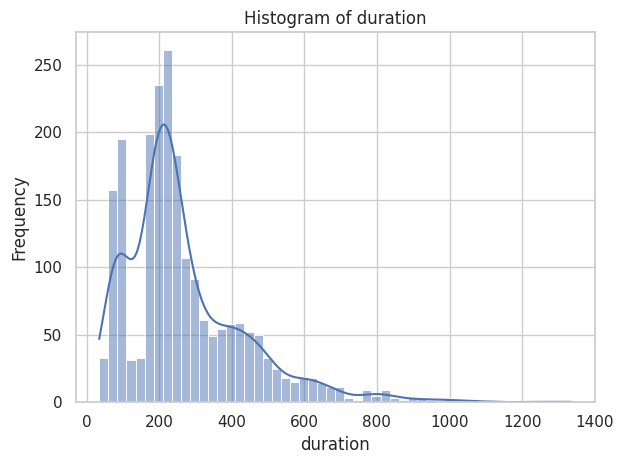

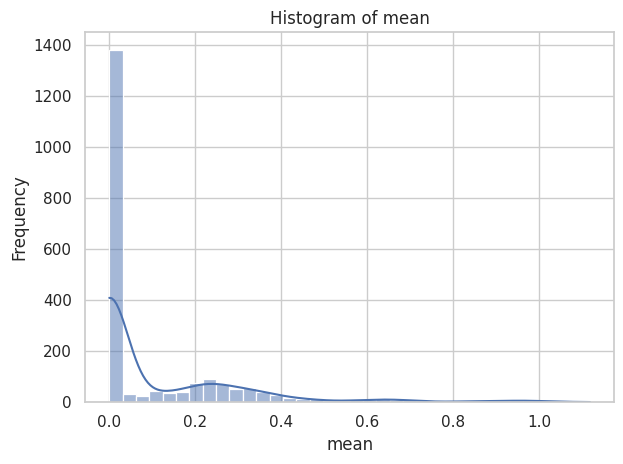

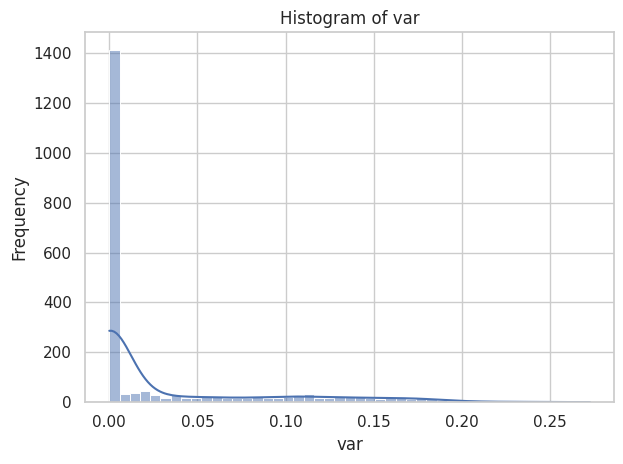

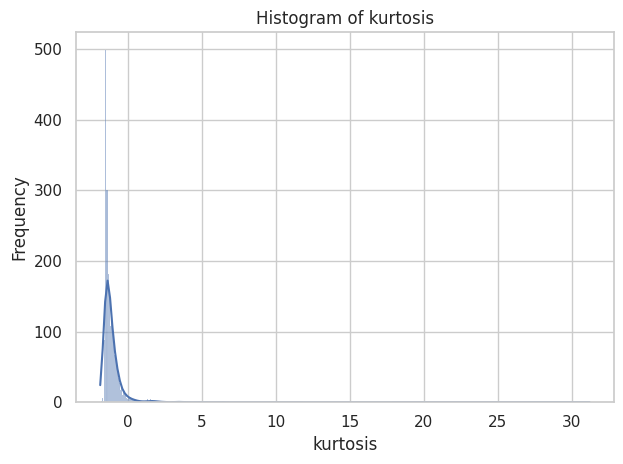

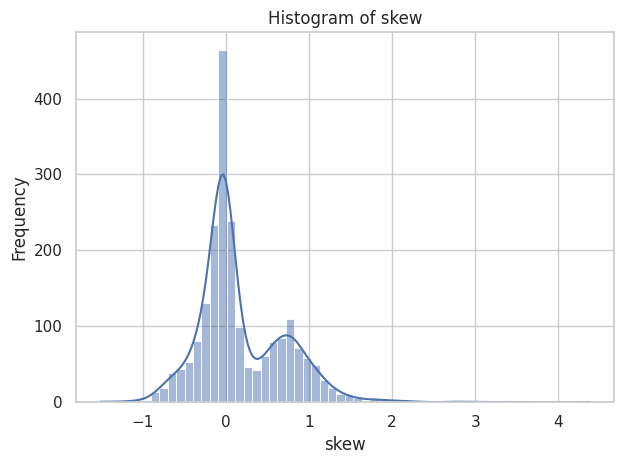

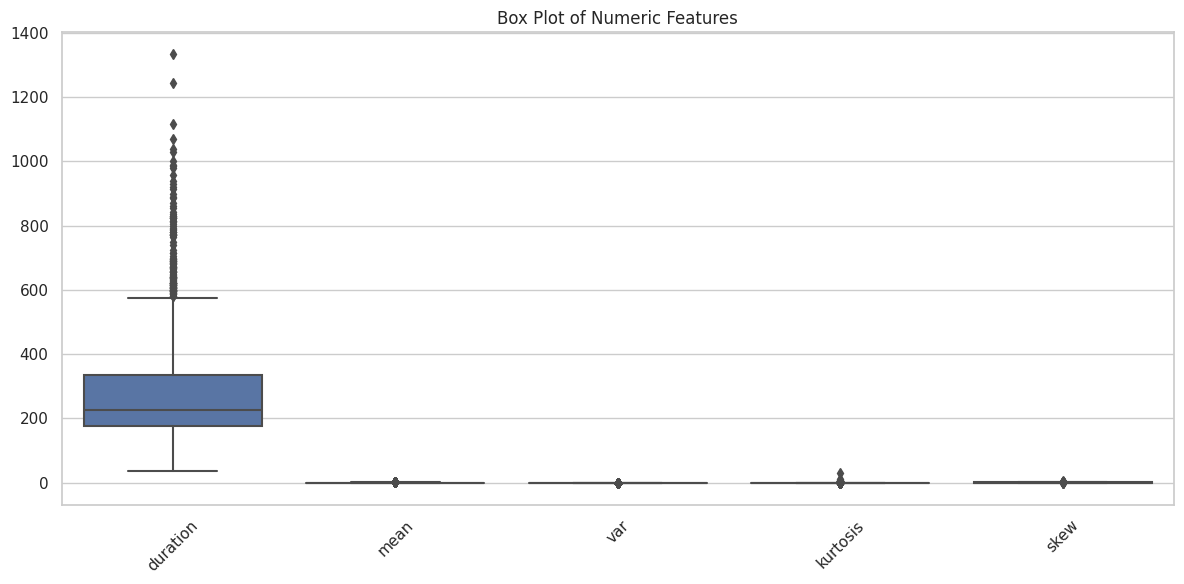

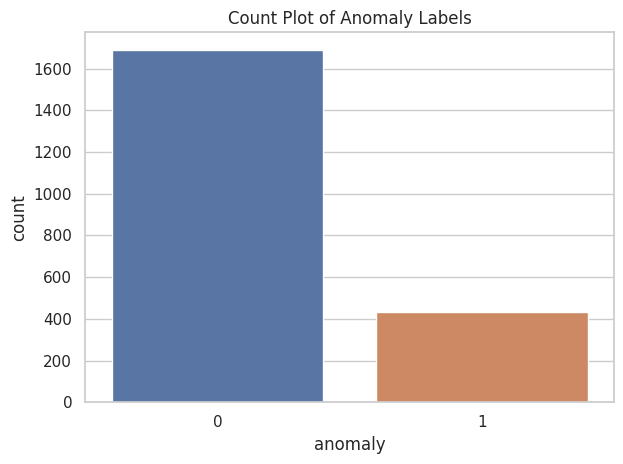

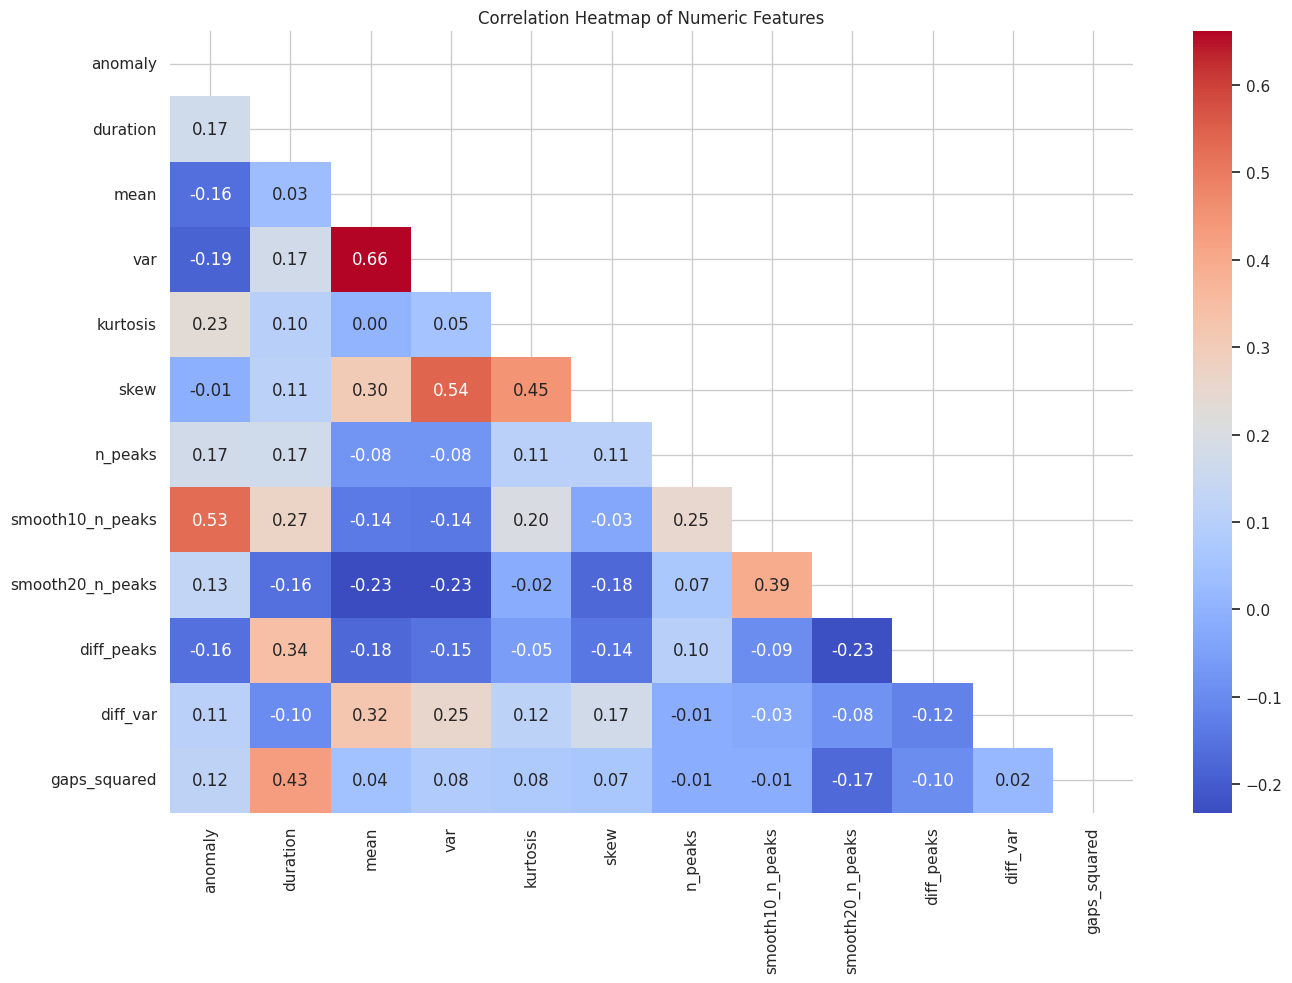

Series([], dtype: float64)


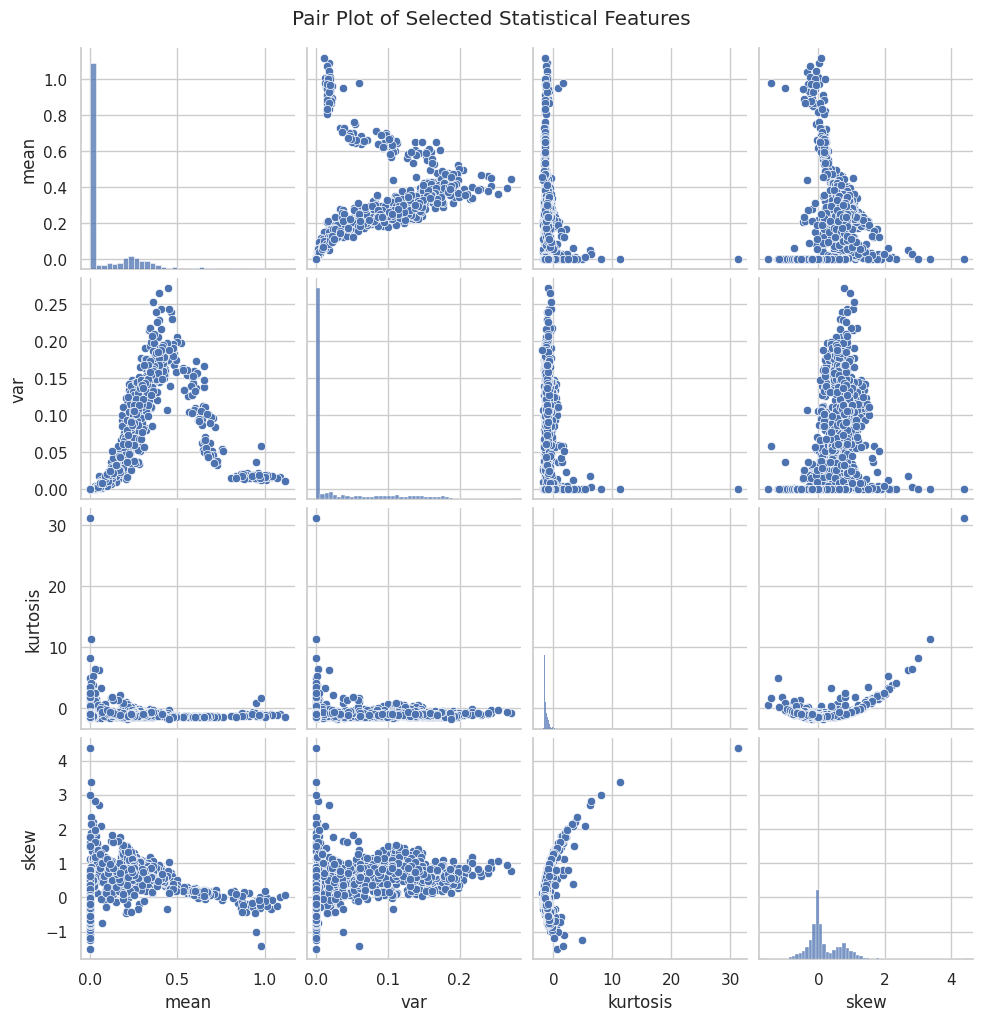

In [4]:
# Let's perform a variety of visualizations on the dataset

## Histogram of select numeric features
numeric_features = ['duration', 'mean', 'var', 'kurtosis', 'skew']
for feature in numeric_features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Box Plot for numeric features to view outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features])
plt.title('Box Plot of Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Count Plot for anomaly labels
plt.figure()
sns.countplot(x='anomaly', data=df)
plt.title('Count Plot of Anomaly Labels')
plt.tight_layout()
plt.show()

## Correlation Heatmap (only if 4 or more numeric columns are present)
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=['train'])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(14, 10))
    corr = numeric_df.corr()
    matrix = corr
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
    
    
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
matrix = matrix.unstack()
print(matrix[(abs(matrix) >= 0.8) & (abs(matrix) < 1)])

## Pair Plot for visualizing relationships between select features
sample_features = ['mean', 'var', 'kurtosis', 'skew']
sns.pairplot(df[sample_features].dropna())
plt.suptitle('Pair Plot of Selected Statistical Features', y=1.02)
plt.show()

# Note: In some cases, if there are too many features, pair plots may become cluttered. Use with a small subset.

## Prediction Model

In [5]:
excluded_cols = ['train', 'anomaly']
features = [col for col in df.columns if col not in excluded_cols]

print(features)

# Split into train and test
train_df = df[df['train'] == 1].copy()
test_df = df[df['train'] == 0].copy()

display(train_df)
display(test_df)

# Ensure only numeric features and consistent columns
train_X = train_df[features].select_dtypes(include=[np.number])
test_X = test_df[features].select_dtypes(include=[np.number])

train_y = train_df['anomaly']
test_y = test_df['anomaly']


['duration', 'mean', 'var', 'kurtosis', 'skew', 'n_peaks', 'smooth10_n_peaks', 'smooth20_n_peaks', 'diff_peaks', 'diff_var', 'gaps_squared']


,anomaly,train,duration,mean,var,kurtosis,skew,n_peaks,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff_var,gaps_squared
0,1,1,279,8.533143e-07,3.494283e-10,0.631117,0.552052,4,3,2,4,1.271176e-10,309
1,1,1,476,-3.639396e-06,6.476485e-10,-1.243611,0.425632,1,1,1,5,1.489383e-12,644
2,1,1,594,1.170788e-05,5.592877e-10,-0.284593,-0.826187,3,2,2,2,4.112280e-12,772
3,1,1,271,8.486808e-07,5.466024e-10,-0.887088,-0.138498,2,2,2,3,2.475760e-11,339
5,0,1,252,6.326025e-06,6.643180e-10,-1.302309,-0.179240,1,1,1,66,6.430575e-13,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,0,1,160,-2.909492e-05,1.098482e-10,-1.521725,0.013472,1,1,1,2,4.288093e-12,800
2119,0,1,165,-2.318618e-05,1.988522e-10,-1.490978,-0.038516,1,1,1,4,7.349826e-12,825
2120,0,1,140,-3.137510e-05,1.146533e-10,-1.504177,0.013923,1,1,1,3,5.763149e-12,700
2121,0,1,200,-5.376693e-06,7.755461e-10,-1.470041,-0.002828,1,1,1,2,1.837184e-11,1000


,anomaly,train,duration,mean,var,kurtosis,skew,n_peaks,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff_var,gaps_squared
4,0,0,255,0.000011,5.279023e-10,-1.484393,-0.060155,1,1,1,78,5.547101e-13,357
6,0,0,378,0.000003,3.843725e-10,-0.736379,-0.078294,1,1,1,111,3.793821e-13,528
11,0,0,238,0.000008,6.720665e-10,-1.477101,-0.044238,1,1,1,66,8.337572e-13,238
12,1,0,229,-0.000002,6.086603e-10,-0.812623,0.389746,1,1,1,1,9.853793e-12,229
17,0,0,213,-0.000001,2.435483e-10,-1.086335,-0.321541,1,1,1,47,1.554131e-12,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0,0,75,-0.000008,4.211976e-10,-1.475363,-0.027797,1,1,2,1,6.822508e-11,375
2110,0,0,145,-0.000027,1.306827e-10,-1.199398,-0.217889,1,1,1,5,5.665315e-12,725
2113,0,0,145,0.000009,2.502306e-10,-0.788751,-0.651451,1,1,1,2,6.690331e-12,725
2115,0,0,145,0.000027,6.269720e-11,-0.971084,-0.534071,1,1,1,5,2.455740e-12,725


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# --- Preprocessing ---
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = np.array(train_y)   # ✅ Convert to NumPy array

# --- Early stopping ---
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# --- K-Fold setup ---
Kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold = 0
aucs = []

# --- Cross-validation loop ---
for train_idx, val_idx in Kfold.split(train_X, train_y):
    X_tr, y_tr = train_X[train_idx], train_y[train_idx]
    X_val, y_val = train_X[val_idx], train_y[val_idx]

    model = Sequential([
        Dense(64, activation='relu', input_shape=(train_X.shape[1],), kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.1),

        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.1),

        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.1),

        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )

    model.fit(
        X_tr, y_tr,
        validation_data=(X_val, y_val),
        epochs=50,
        callbacks=[early_stop],
        verbose=0
    )

    pred_prob = model.predict(X_val).ravel()
    pred = (pred_prob > 0.5).astype(int)

    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)

    print(f"======= Fold {fold} ========")
    print(f"Accuracy: {acc_score:.4f}, AUC: {auc_score:.4f}")
    aucs.append(auc_score)
    fold += 1

oof_auc = np.mean(aucs)
print(f"\n✅ Out-of-fold AUC score: {oof_auc:.4f}")

model.summary()


2025-11-03 23:59:07.540869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762214347.809790      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762214347.876336      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1762214361.952956      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762214361.953874      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  
======= Fold 0 ========
Accuracy: 0.9500, AUC: 0.9389
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
======= Fold 1 ========
Accuracy: 0.9500, AUC: 0.9717
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
======= Fold 2 ========
Accuracy: 0.9250, AUC: 0.9553
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
======= Fold 3 ========
Accuracy: 0.9625, AUC: 0.9724
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
======= Fold 4 ========
Accuracy: 0.9686, AUC: 0.9648
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
======= Fold 5 ========
Accuracy: 0.9748, AUC: 0.9665
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
======= Fold 6 ========
Accuracy: 0.9874, AUC: 0.9980
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
======= Fold 7 ========
Accuracy: 0.9874, AUC: 0.9906
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
======= Fold 8 ========
Accuracy: 0.9434, AUC: 0.9668
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
======= Fold 9 ========
Accuracy: 0.9811, AUC: 0.9924

✅ Out-of-fold AUC score: 0.9718


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,421 (236.02 KB)

 Trainable params: 19,969 (78.00 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 39,940 (156.02 KB)